In [ ]:
# Copyright (C) 2021 by Dmitry Semenov <dmitry.semenov@uef.fi>
#
# Permission to use, copy, modify, and/or distribute this software for any
# purpose with or without fee is hereby granted.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
# AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
# INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
# LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
# OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
# PERFORMANCE OF THIS SOFTWARE.

In [1]:
# Connect to goggle drive
from google.colab import drive
drive.mount("/content/drive")

# Import needed libraries 
import matplotlib.pyplot as plt
import numpy

Mounted at /content/drive


This code below is not needed

Image_Cube_540.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_540.tif
(1040, 1392)
3118


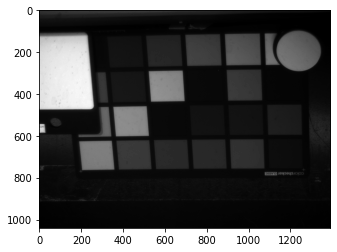

In [2]:
# Not needed code
from PIL import Image
import os
# prepare file path to read
dirpath = "/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]"
file = "Image_Cube_"
i = 540
nu = str(i)
ext = ".tif"
filename = file+nu+ext
print(filename)
fullpath = os.path.join(dirpath, filename)
print(fullpath)

im = Image.open(fullpath) 
imarray = numpy.array(im) 
print(imarray.shape)
print(numpy.amax(imarray)) 
plt.imshow(imarray, cmap='gray') #, vmin=0, vmax=3138
im.show()

This code below does not arrange slice in alphabetical order

This code below works just fine
ENVI
description = {
File Imported into ENVI}
file type = ENVI

samples = 1392
bands = 17
lines = 1040

interleave = bil
data type = 12
header offset = 0
byte order = 0

1040 1392 33
(1040, 33, 1392)
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_420.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_450.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_440.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_410.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_460.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_400.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_430.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_690.tif
/c

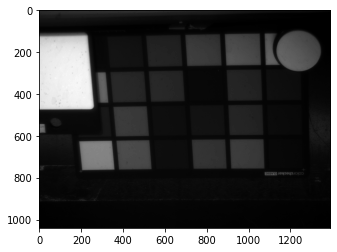

In [3]:
# Read Dir with Nuance spectral image slices
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# This will be arbitrary order of spectral slices [Color checker_400.tif, Color checker_720.tif]. Thus it can be 500, 720, 420... etc, i.e. wrong order
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dirpath = "/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath) 
single_slice = numpy.array(im) # make a numpy array
[x, y] = single_slice.shape 
spectral = len(myDir)
print(x, y, spectral)

# save as integers, data type = 12
spectral_cube = numpy.ndarray(shape=(x,spectral,y), dtype=numpy.uint16)
print(spectral_cube.shape)

i=0
for file in myDir:
  fullpath = os.path.join(dirpath, file)
  print(fullpath)
  im = Image.open(fullpath) 
  single_slice = numpy.array(im)
  #print(imarray.shape)
  spectral_cube[:,i,:]=single_slice
  i = i + 1

# Save ready ENVI cube made of tiffs
saveraw = "/content/drive/MyDrive/Temp results/nuance.raw"
fileobj = open(saveraw, mode='wb')
spectral_cube.tofile(fileobj)
fileobj.close()
print('Ready')
plt.imshow(spectral_cube[:,10,:], cmap='gray') #, vmin=0, vmax=3138
im.show()

In [4]:
print(spectral_cube.shape)

(1040, 33, 1392)


In [ ]:
print(spectral_cube.shape)

(1040, 51, 1392)


In [5]:
# Read Dir with Nuance spectral image slices
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Read slices in a correct order
# Order will be Red - band 16, Green - band 10, Blue - band 7
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dirpath = dirpath = "/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath) 
single_slice = numpy.array(im)
[x, y] = single_slice.shape 
spectral = len(myDir)
print(x, y, spectral)

# save as integers, data type = 12
spectral_cube = numpy.ndarray(shape=(x,spectral,y), dtype=numpy.uint16)
print(spectral_cube.shape)

band=0
for i in range(400,740,20):
  # prepare file path ################
  dirpath = dirpath = "/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]"
  file = "Image_Cube_"
  nu = str(i)
  ext = ".tif"
  filename = file+nu+ext
  print(filename)
  fullpath = os.path.join(dirpath, filename)
  print(fullpath)
  print(i)  
  print(band)
  ####################################

  im = Image.open(fullpath) 
  single_slice = numpy.array(im)
  #print(imarray.shape)
  spectral_cube[:,band,:]=single_slice
  band = band + 1


saveraw = "/content/drive/MyDrive/nuance.raw"
fileobj = open(saveraw, mode='wb')
spectral_cube.tofile(fileobj)
fileobj.close()
print('Ready')

1040 1392 33
(1040, 33, 1392)
Image_Cube_400.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_400.tif
400
0
Image_Cube_420.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_420.tif
420
1
Image_Cube_440.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_440.tif
440
2
Image_Cube_460.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_460.tif
460
3
Image_Cube_480.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_480.tif
480
4
Image_Cube_500.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Colorchecker 2 lamps [Nuance]/Image_Cube_500.tif
500
5
Image_Cube_520.tif
/content/drive/MyDrive/Colab Notebooks/ASI autumn 2022/Group1 session 1/Col

uint16


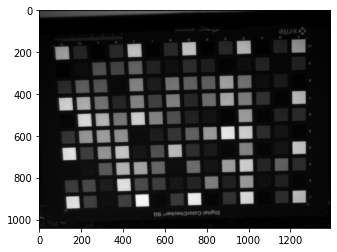

In [ ]:
plt.imshow(spectral_cube[:,10,:], cmap="gray")
#plt.imshow(single_slice, cmap="gray")
print(single_slice.dtype)
plt.show()